In [193]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
import quandl
apple = quandl.get("EOD/AAPL", authtoken="mUzt6A6xTvmpphnUPGWq", start_date = '1990-01-01')
microsoft = quandl.get("EOD/MSFT", authtoken="mUzt6A6xTvmpphnUPGWq", start_date = '1990-01-01')


In [13]:
apple.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1990-01-02,35.25,37.50,35.00,37.25,1635700.0,0.0,1.0,1.034248,1.100264,1.026913,1.092929,45799600.0
1990-01-03,38.00,38.00,37.50,37.50,1857100.0,0.0,1.0,1.114934,1.114934,1.100264,1.100264,51998800.0
1990-01-04,38.25,38.75,37.25,37.63,1977800.0,0.0,1.0,1.122269,1.136939,1.092929,1.104078,55378400.0
1990-01-05,37.75,38.25,37.00,37.75,1101000.0,0.0,1.0,1.107599,1.122269,1.085594,1.107599,30828000.0
1990-01-08,37.50,38.00,37.00,38.00,906900.0,0.0,1.0,1.100264,1.114934,1.085594,1.114934,25393200.0


In [149]:
microsoft.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1990-01-02,87.25,88.75,86.12,88.75,368289.0,0.0,1.0,0.394773,0.401560,0.389661,0.401560,53033616.0
1990-01-03,89.50,90.25,88.50,89.25,790089.0,0.0,1.0,0.404954,0.408347,0.400429,0.403823,113772816.0
1990-01-04,89.25,92.00,88.75,91.87,873200.0,0.0,1.0,0.403823,0.416265,0.401560,0.415677,125740800.0
1990-01-05,91.50,92.00,89.50,89.62,483089.0,0.0,1.0,0.414003,0.416265,0.404954,0.405497,69564816.0
1990-01-08,89.50,91.00,88.50,91.00,409600.0,0.0,1.0,0.404954,0.411741,0.400429,0.411741,58982400.0


In [177]:
apple.reset_index(level=0, inplace=True)
microsoft.reset_index(level=0, inplace=True)

In [32]:
apple.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,,
2019-02-15,2019-02-15,171.25,171.70,169.75,170.42,24626814.0,0.0,1.0,171.25,171.70,169.75,170.42,24626814.0
2019-02-19,2019-02-19,169.71,171.44,169.49,170.93,18972826.0,0.0,1.0,169.71,171.44,169.49,170.93,18972826.0
2019-02-20,2019-02-20,171.19,173.32,170.99,172.03,26114362.0,0.0,1.0,171.19,173.32,170.99,172.03,26114362.0
2019-02-21,2019-02-21,171.80,172.37,170.30,171.06,17249670.0,0.0,1.0,171.80,172.37,170.30,171.06,17249670.0
2019-02-22,2019-02-22,171.58,173.00,171.38,172.97,18913154.0,0.0,1.0,171.58,173.00,171.38,172.97,18913154.0


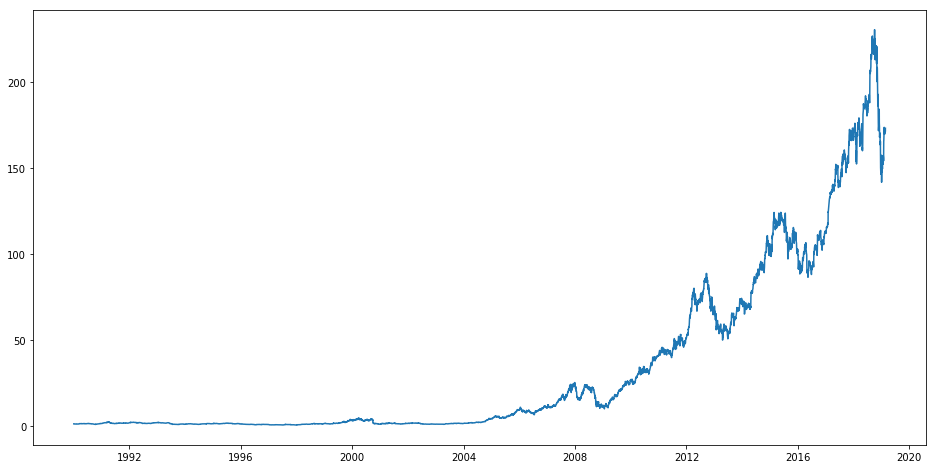

In [17]:
#setting index as date
apple['Date'] = pd.to_datetime(apple.Date,format='%Y-%m-%d')
apple.index = apple['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(apple['Adj_Close'], label='Close Price history')

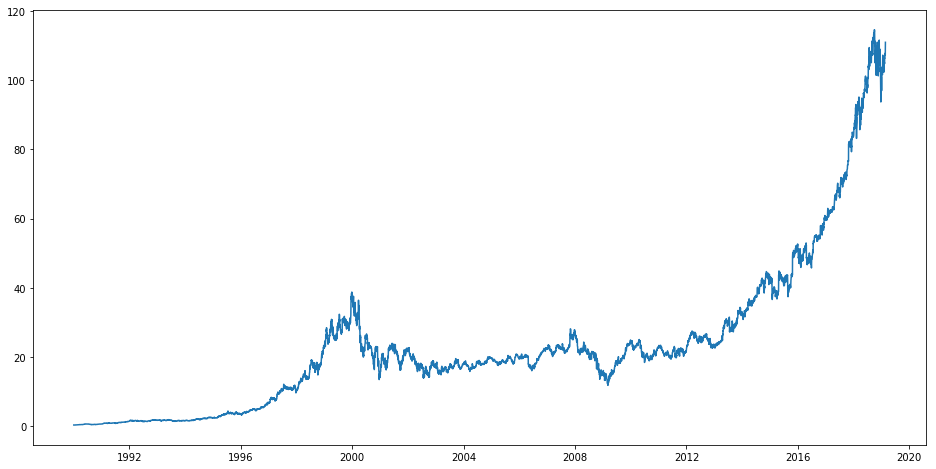

In [18]:
#setting index as date
microsoft['Date'] = pd.to_datetime(microsoft.Date,format='%Y-%m-%d')
microsoft.index = microsoft['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(microsoft['Adj_Close'], label='Close Price history')

In [176]:
#Extracting Adj_Close 
stocks = pd.DataFrame({"AAPL": apple["Adj_Close"],
                      "MSFT": microsoft["Adj_Close"]})
stocks.head()

,AAPL,MSFT
Date,,
1990-01-02,1.092929,0.401560
1990-01-03,1.100264,0.403823
1990-01-04,1.104078,0.415677
1990-01-05,1.107599,0.405497
1990-01-08,1.114934,0.411741


In [174]:
stocks.reset_index(level=0, inplace=True)

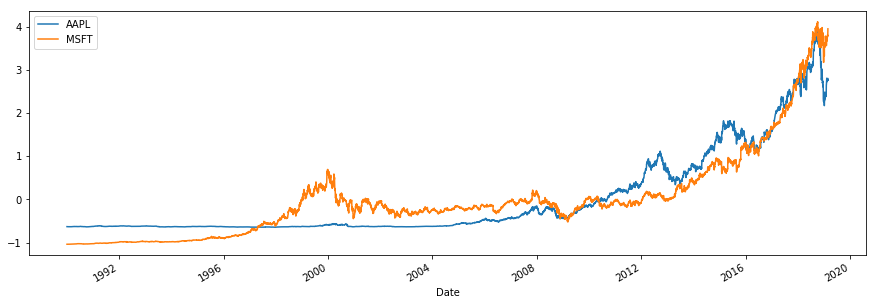

In [180]:
stock_return = (stocks-stocks.mean())/stocks.std()
stock_return.head() - 1
stock_return.plot(figsize=(15,5))

In [21]:
#creating dataframe with date and the target variable
data = stocks.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(stocks)),columns=['Date','AAPL'])



In [22]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['AAPL'][i] = data['AAPL'][i]

In [23]:
new_data.head()

,Date,AAPL
0,1990-01-02 00:00:00,1.09293
1,1990-01-03 00:00:00,1.10026
2,1990-01-04 00:00:00,1.10408
3,1990-01-05 00:00:00,1.1076
4,1990-01-08 00:00:00,1.11493


In [56]:
#Find the row id 
query = '2019-01-02'
stocks[stocks['Date']== query]

,Date,AAPL,MSFT
7307,2019-01-02,157.24639,100.687743


In [55]:
#Find the row id 
query = '2017-01-03'
stocks[stocks['Date']== query]

,Date,AAPL,MSFT
6805,2017-01-03,112.133559,59.918276


In [128]:
#splitting into train and validation
train = new_data[6805:7307]
valid = new_data[7307:]

In [129]:
new_data.shape, train.shape, valid.shape

((7343, 2), (502, 2), (36, 2))

In [130]:
#Dsiplay timestamps
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2017-01-03 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-02-22 00:00:00'))

# Moving Average

In [131]:
#make predictions
preds = []
for i in range(0,36):
    a = valid['AAPL'][len(valid)-36+i:].sum() + sum(preds)
    b = a/36
    preds.append(b)

In [132]:
preds

[160.72984285120697,
 160.82660542790757,
 161.36113650592884,
 161.74262377132956,
 162.14383547133886,
 162.47819273935934,
 162.7510299235708,
 163.0178928657234,
 163.33393419722583,
 163.722094231654,
 164.0361224650051,
 164.30715083012865,
 164.5602612129647,
 164.79384952013146,
 165.13128709672168,
 165.4609491787294,
 165.8335128761649,
 166.07646955127606,
 166.36655758819927,
 166.70951167803545,
 166.76963356144785,
 166.7985109405439,
 166.82597772575627,
 166.72337902943002,
 166.53688864584163,
 166.34355841634294,
 166.23613356394347,
 166.12019282960856,
 166.02825374154213,
 165.89320523436274,
 165.77412760198393,
 165.6345200353724,
 165.50159003635497,
 165.35080087069818,
 165.16526756155088,
 165.0015249938162]

In [133]:
#making next 7 days prediction:
future_preds = []
for i in range(0,7):
    #a1 = sum(preds[len(preds)-7+i:]) + sum(future_preds)
    a1 = valid['AAPL'][len(valid)-7+i:].sum() + sum(future_preds)
    b1 = a1/7
    future_preds.append(b1)

In [134]:
future_preds

[171.1985714285714,
 171.34408163265306,
 171.42180758017494,
 171.5649229487713,
 171.65562622716723,
 171.6021442596197,
 171.6795934395654]

In [135]:
#RMSE
rms=np.sqrt(np.mean(np.power((np.array(valid['AAPL'])-preds),2)))
rms

9.190571952408936

C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


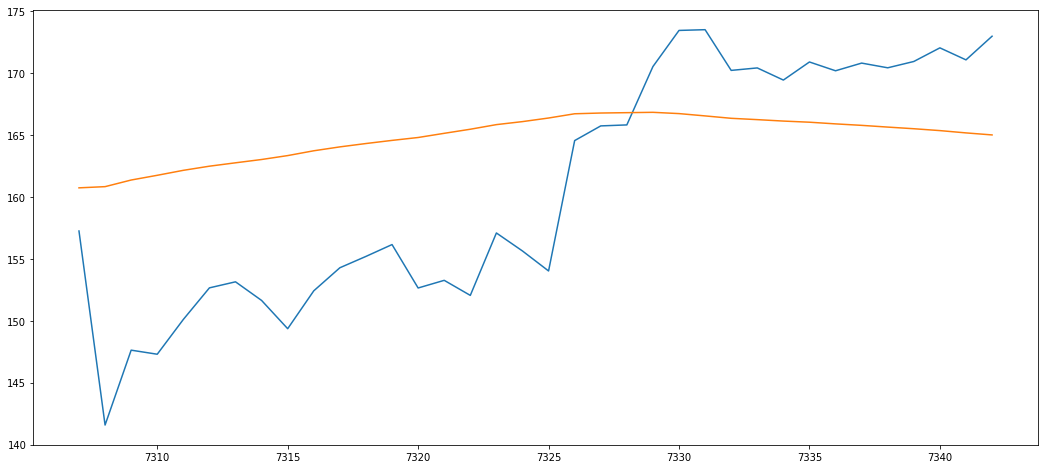

In [141]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(18,8))
#plt.plot(train['AAPL'])
plt.plot(valid[['AAPL', 'Predictions']])



Text(0.5, 0.98, 'AAPL - Next 7 Days')

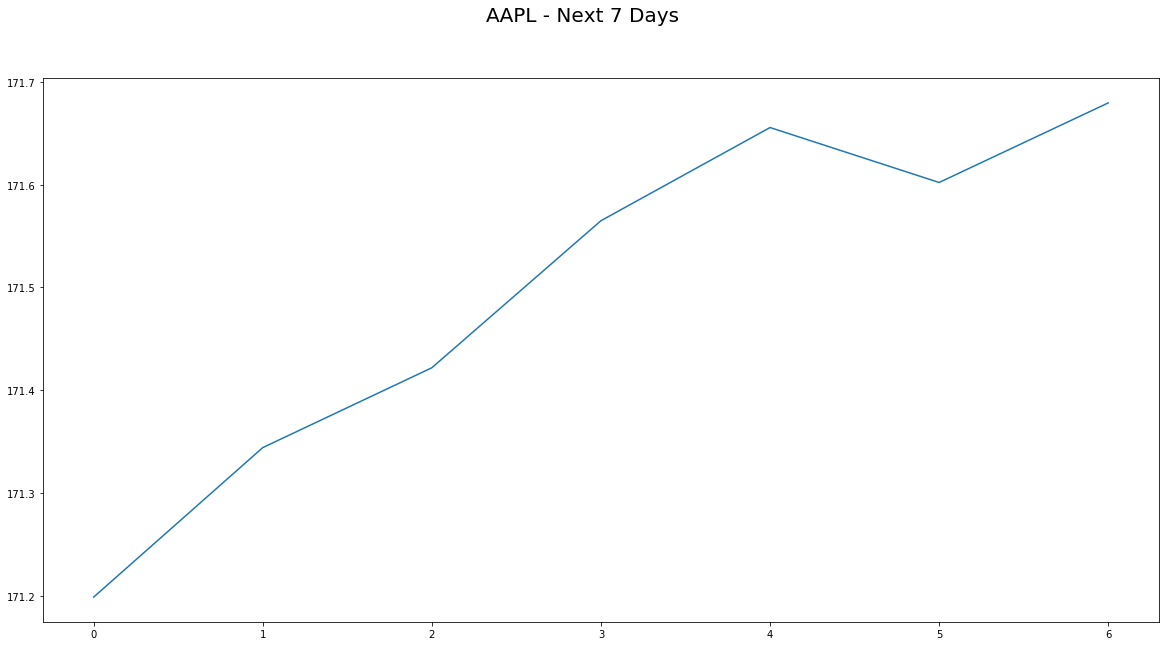

In [137]:
fig = plt.figure()
plt.plot(future_preds)
fig.suptitle('AAPL - Next 7 Days', fontsize=20)

In [142]:
#creating dataframe with date and the target variable
data1 = stocks.sort_index(ascending=True, axis=0)
new_data1 = pd.DataFrame(index=range(0,len(stocks)),columns=['Date','MSFT'])


In [143]:
for i in range(0,len(data1)):
     new_data1['Date'][i] = data1['Date'][i]
     new_data1['MSFT'][i] = data1['MSFT'][i]

In [144]:
#splitting into train and validation
train = new_data1[6805:7307]
valid = new_data1[7307:]

In [145]:
#make predictions
preds = []
for i in range(0,36):
    a = valid['MSFT'][len(valid)-36+i:].sum() + sum(preds)
    b = a/36
    preds.append(b)

In [146]:
#RMSE
rms=np.sqrt(np.mean(np.power((np.array(valid['MSFT'])-preds),2)))
rms

2.558465406341

In [120]:
preds

[104.84783059195244,
 104.96338858687237,
 105.1850481408774,
 105.28756947058648,
 105.38934294029958,
 105.47347576402666,
 105.51928682737444,
 105.58490197453493,
 105.67446699365738,
 105.78726420715144,
 105.82132392933019,
 105.84609591149709,
 105.85108831746828,
 105.81224153377478,
 105.82846351630674,
 105.81664730214598,
 105.81860896829225,
 105.79379586002007,
 105.82610088446451,
 105.91849360823481,
 105.9183057119174,
 105.97204771690956,
 106.07291996515596,
 106.09472347305238,
 106.07619726032307,
 106.09007068368918,
 106.12535034746263,
 106.15054638740379,
 106.18805911256061,
 106.18125303844074,
 106.17647062960499,
 106.16906606281849,
 106.12494588579547,
 106.08098310011117,
 106.05128818622536,
 105.95799063584273]

C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


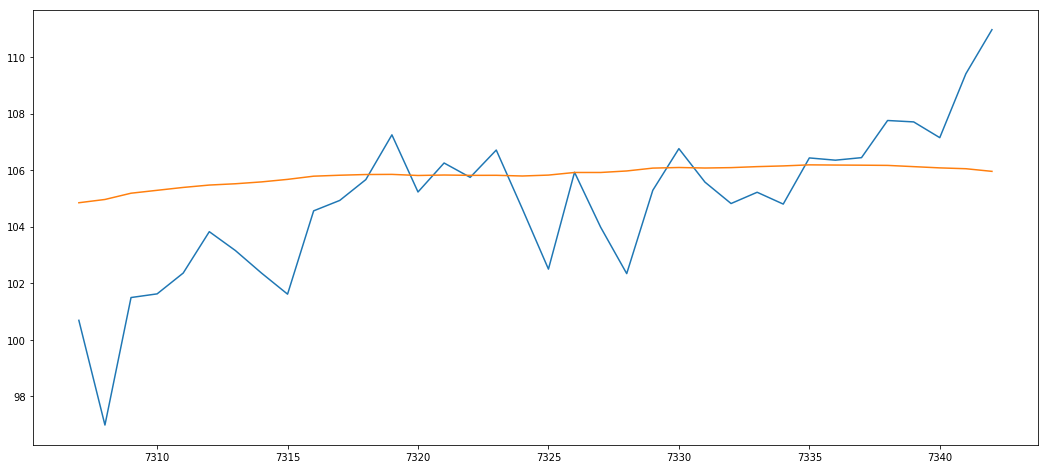

In [190]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(18,8))
plt.plot(valid[['MSFT', 'Predictions']])


In [122]:
future_preds = []
for i in range(0,7):
    a1 = valid['MSFT'][len(valid)-7+i:].sum() + sum(future_preds)
    b1 = a1/7
    future_preds.append(b1)

Text(0.5, 0.98, 'MSFT - Next 7 Days')

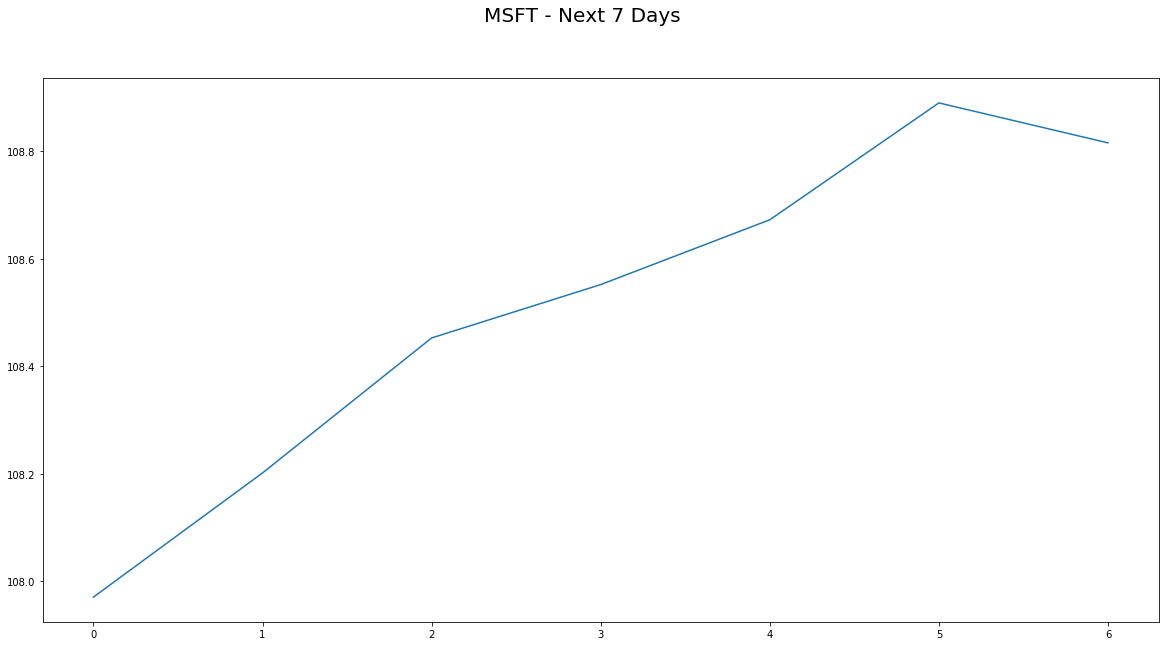

In [126]:
fig = plt.figure()
plt.plot(future_preds)
fig.suptitle('MSFT - Next 7 Days', fontsize=20)

# AutoRegression

In [150]:
apple.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1990-01-02,35.25,37.50,35.00,37.25,1635700.0,0.0,1.0,1.034248,1.100264,1.026913,1.092929,45799600.0
1990-01-03,38.00,38.00,37.50,37.50,1857100.0,0.0,1.0,1.114934,1.114934,1.100264,1.100264,51998800.0
1990-01-04,38.25,38.75,37.25,37.63,1977800.0,0.0,1.0,1.122269,1.136939,1.092929,1.104078,55378400.0
1990-01-05,37.75,38.25,37.00,37.75,1101000.0,0.0,1.0,1.107599,1.122269,1.085594,1.107599,30828000.0
1990-01-08,37.50,38.00,37.00,38.00,906900.0,0.0,1.0,1.100264,1.114934,1.085594,1.114934,25393200.0


In [151]:
apple = apple.drop(apple.columns[[0,1,2,3,4,5,6,7,8,9,11]], axis=1)

In [152]:
apple.head()

,Adj_Close
Date,
1990-01-02,1.092929
1990-01-03,1.100264
1990-01-04,1.104078
1990-01-05,1.107599
1990-01-08,1.114934


C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  after removing the cwd from sys.path.


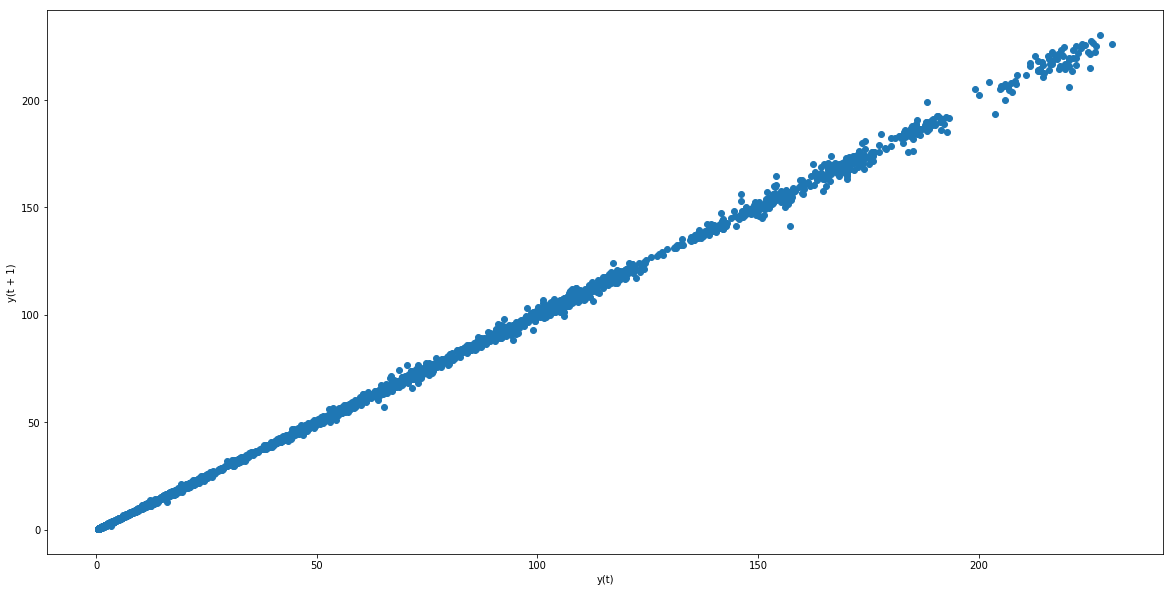

In [153]:
#Lag plot
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
lag_plot(apple)
pyplot.show()

In [156]:
#Building model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = apple.values
train, test = X[1:len(X)-29], X[len(X)-30:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=151.712491, expected=153.143964
predicted=151.876051, expected=151.640405
predicted=153.064262, expected=149.360173
predicted=147.689133, expected=152.417078
predicted=151.786299, expected=154.279101
predicted=152.904322, expected=155.195177
predicted=156.435410, expected=156.151082
predicted=156.060884, expected=152.646097
predicted=152.340734, expected=153.263452
predicted=154.186597, expected=152.048656
predicted=152.888230, expected=157.087073
predicted=155.543149, expected=155.633300
predicted=155.734105, expected=154.020210
predicted=152.879027, expected=164.545124
predicted=164.891176, expected=165.730048
predicted=165.633041, expected=165.809707
predicted=165.679442, expected=170.519531
predicted=172.404726, expected=173.437033
predicted=173.724294, expected=173.496777
predicted=172.599482, expected=170.210853
predicted=169.949261, expected=170.410000
predicted=171.262178, expected=169.430000
predicted=168.176700, expected=170.890000
predicted=173.210205, expected=170

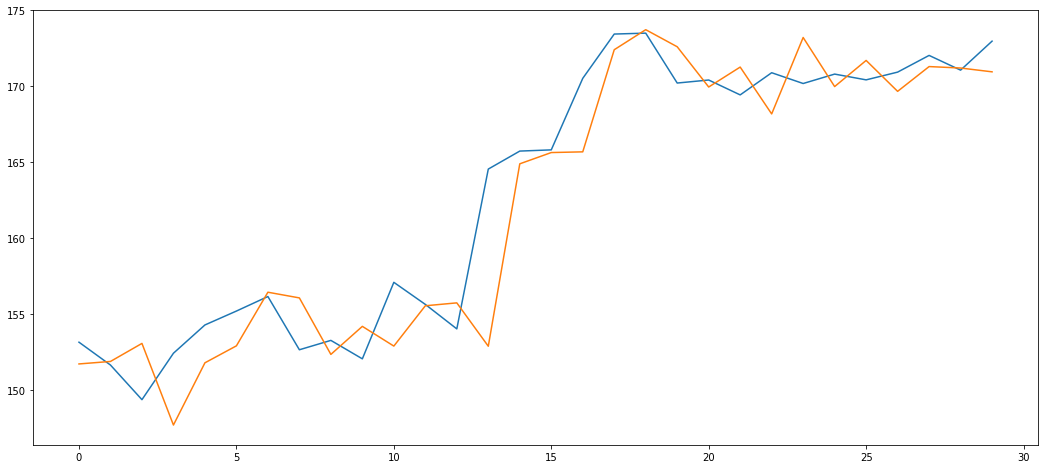

In [157]:
plt.figure(figsize=(18,8))
plt.plot(test)
plt.plot(predictions)

In [158]:
future = pd.read_csv('future.csv')

In [169]:
#Next day prediction
# split dataset
X = apple.values
Y = future['AAPL']
train, test = X[1:len(X)-3], Y[len(Y)-1:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted AAPL next day Stock =%f' % (yhat))


predicted AAPL next day Stock =170.878411


In [194]:
microsoft.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1990-01-02,87.25,88.75,86.12,88.75,368289.0,0.0,1.0,0.394773,0.401560,0.389661,0.401560,53033616.0
1990-01-03,89.50,90.25,88.50,89.25,790089.0,0.0,1.0,0.404954,0.408347,0.400429,0.403823,113772816.0
1990-01-04,89.25,92.00,88.75,91.87,873200.0,0.0,1.0,0.403823,0.416265,0.401560,0.415677,125740800.0
1990-01-05,91.50,92.00,89.50,89.62,483089.0,0.0,1.0,0.414003,0.416265,0.404954,0.405497,69564816.0
1990-01-08,89.50,91.00,88.50,91.00,409600.0,0.0,1.0,0.404954,0.411741,0.400429,0.411741,58982400.0


In [195]:
microsoft = microsoft.drop(microsoft.columns[[0,1,2,3,4,5,6,7,8,9,11]], axis=1)

In [196]:
microsoft.head()

,Adj_Close
Date,
1990-01-02,0.401560
1990-01-03,0.403823
1990-01-04,0.415677
1990-01-05,0.405497
1990-01-08,0.411741


C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


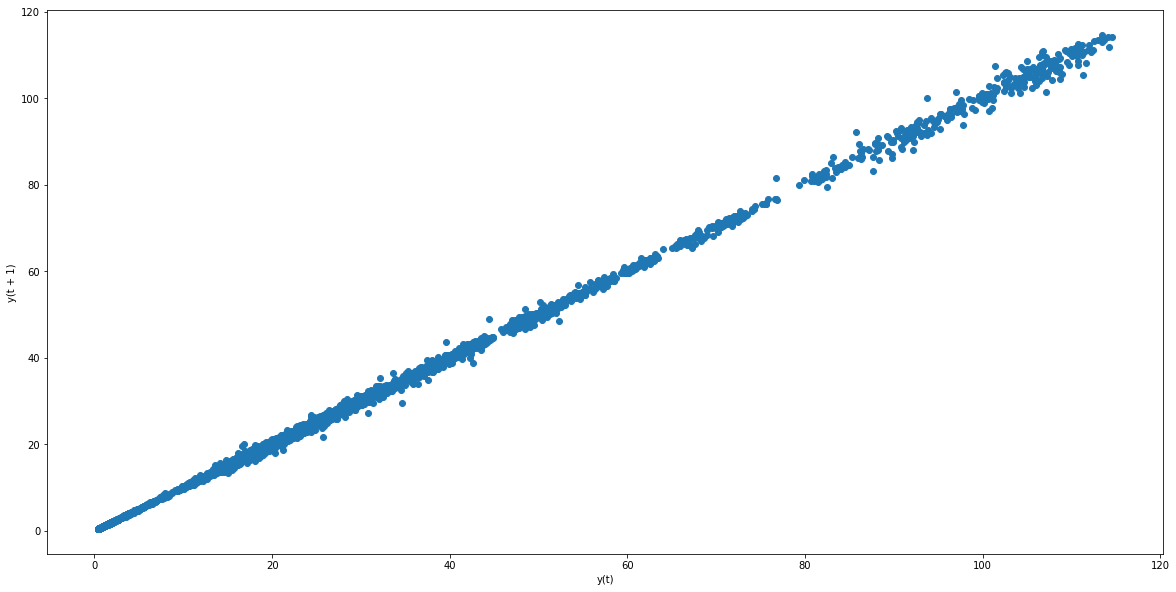

In [197]:
#Lag Plot
lag_plot(microsoft)
pyplot.show()

In [165]:
#Building model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = microsoft.values
train, test = X[1:len(X)-29], X[len(X)-30:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=102.891067, expected=103.157142
predicted=103.644780, expected=102.360561
predicted=102.765362, expected=101.613767
predicted=101.468625, expected=104.561114
predicted=104.360255, expected=104.929533
predicted=104.898624, expected=105.666369
predicted=106.661516, expected=107.249573
predicted=107.340361, expected=105.228250
predicted=105.396866, expected=106.253847
predicted=105.974808, expected=105.746027
predicted=105.445820, expected=106.711881
predicted=107.138098, expected=104.630815
predicted=105.337491, expected=102.499963
predicted=102.722712, expected=105.925258
predicted=105.689730, expected=103.983594
predicted=104.148460, expected=102.340647
predicted=102.655631, expected=105.287994
predicted=105.408575, expected=106.761667
predicted=106.567151, expected=105.576754
predicted=105.959400, expected=104.820003
predicted=104.763093, expected=105.218293
predicted=104.844676, expected=104.800088
predicted=105.133320, expected=106.433078
predicted=106.593214, expected=106

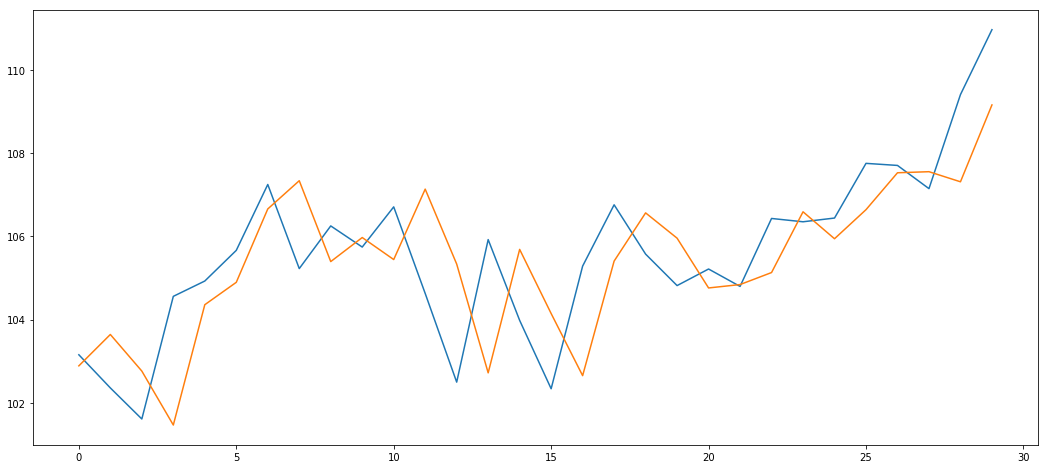

In [166]:
plt.figure(figsize=(18,8))
plt.plot(test)
plt.plot(predictions)

In [167]:
#Next day prediction
# split dataset
X = microsoft.values
Y = future['AAPL']
train, test = X[1:len(X)-3], Y[len(Y)-1:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted MSFT next day Stock=%f' % (yhat))


predicted MSFT next day Stock=107.379865
